In [24]:
import numpy as np
from PIL import Image
import math

In [25]:
def gaussian(x, sigma):
    return np.exp(-(x ** 2) / (2 * sigma ** 2))

In [26]:
def bilateral_filter_grayscale(image, diameter=5, sigma_i=12.0, sigma_s=16.0):
    src = np.array(image, dtype=np.float32)
    height, width = src.shape
    dst = np.zeros_like(src)

    half = diameter // 2

    for y in range(height):
        for x in range(width):
            wp_total = 0
            filtered_pixel = 0

            for dy in range(-half, half + 1):
                for dx in range(-half, half + 1):
                    ny = y + dy
                    nx = x + dx

                    if 0 <= ny < height and 0 <= nx < width:
                        gi = gaussian(src[ny, nx] - src[y, x], sigma_i)
                        gs = gaussian(math.sqrt(dx**2 + dy**2), sigma_s)
                        w = gi * gs
                        filtered_pixel += src[ny, nx] * w
                        wp_total += w

            dst[y, x] = filtered_pixel / wp_total

    return Image.fromarray(dst.astype(np.uint8))


In [44]:
img = Image.open("img.jpg").convert('L')
filtered = bilateral_filter_grayscale(img)
filtered.save("bilateral_filtered.jpg")

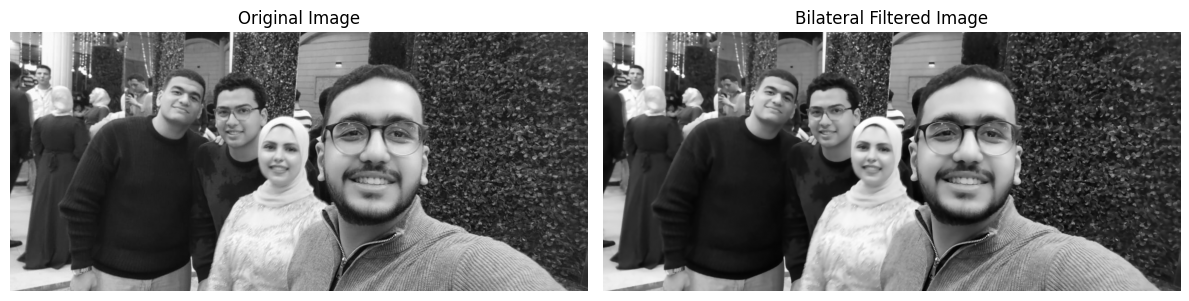

In [45]:
import matplotlib.pyplot as plt

# Convert to displayable numpy arrays
filtered_np = np.array(filtered)
original_np = np.array(img)

# Display
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_np,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_np,cmap = 'gray')
plt.title("Bilateral Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()
